In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.utils import py_random_state
from networkx.generators.random_graphs import _random_subset
import numpy as np
import random

import time
import os

Creazione del grafo con l'algoritmo di Barabasi-Albert

In [2]:
N = 20
M = 3
G = nx.barabasi_albert_graph(N, M)

Rappresentazione del grafico

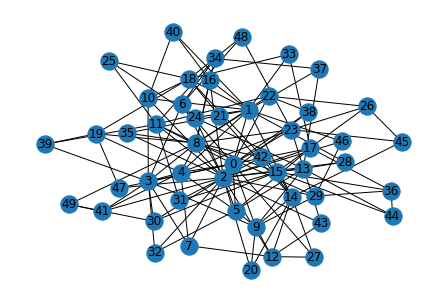

In [3]:
nx.draw(G, with_labels=True)    
plt.show()

Estrazione della matrice di adiacenza A

In [4]:
adjacency = list(G.adjacency())
A = []
for a, b in adjacency :
    A += [[0]*len(adjacency)] 
    for c in b : 
        A[a][c] = 1

Estrazione della matrice di stocastica P e calcolo dei suoi autovalori e autovettori

In [5]:
P = []
for a, b in adjacency :
    P += [[0]*len(adjacency)]
    for c in b: 
        P[a][c] = 1./G.degree[a]

In [6]:
matrixP = np.array(P)
autovaloriP, autovettoriP = np.linalg.eig(np.transpose(matrixP))
autovettoriP = np.transpose(autovettoriP)
pS = autovettoriP[0]
if pS[0] < 0:
    pS = -pS
#np.dot(np.transpose(matrix),autovettori[0])

In [7]:
autovaloriP

array([ 1.        , -0.68277306,  0.63292191,  0.61721364,  0.58412556,
        0.57540059, -0.62430908, -0.587328  , -0.58065018,  0.50160595,
       -0.53132995, -0.49633248, -0.48414316, -0.47150492, -0.45325813,
       -0.42585587, -0.39218062,  0.46456617,  0.44408233,  0.43013349,
       -0.34828661, -0.32834354, -0.30701459, -0.29731957, -0.27263671,
       -0.26560805,  0.38406393,  0.35636232,  0.34215313,  0.32804688,
        0.28871844,  0.27120909,  0.24817741,  0.2243419 ,  0.18452866,
       -0.18447225, -0.16908223, -0.14399244, -0.12920983, -0.11784205,
       -0.07076967, -0.07888021, -0.01480516,  0.00226204,  0.03987764,
        0.13435573,  0.11897595,  0.11051147,  0.08027174,  0.0940224 ])

Definizione della matrice laplaciana L e calcolo dei suoi autovettori e autovalori

In [8]:
matrixL = np.identity(N) - matrixP

In [9]:
autovaloriL, autovettoriL = np.linalg.eig(np.transpose(matrixL))
autovettoriL = np.transpose(autovettoriL)
pS_L = autovettoriL[0]
if pS_L[0] < 0:
    pS_L = -pS_L

In [10]:
autovaloriL

array([5.15080939e-16, 1.68277306e+00, 3.67078091e-01, 3.82786356e-01,
       4.15874441e-01, 4.24599407e-01, 1.62430908e+00, 4.98394051e-01,
       1.58732800e+00, 1.58065018e+00, 5.35433830e-01, 5.55917666e-01,
       5.69866515e-01, 1.53132995e+00, 1.49633248e+00, 1.48414316e+00,
       1.47150492e+00, 1.45325813e+00, 1.42585587e+00, 1.39218062e+00,
       1.34828661e+00, 1.32834354e+00, 1.30701459e+00, 1.29731957e+00,
       1.27263671e+00, 1.26560805e+00, 6.15936075e-01, 6.43637677e-01,
       6.57846872e-01, 6.71953123e-01, 7.11281563e-01, 7.28790906e-01,
       7.51822590e-01, 7.75658097e-01, 8.15471336e-01, 1.18447225e+00,
       1.16908223e+00, 1.14399244e+00, 1.12920983e+00, 1.11784205e+00,
       1.07076967e+00, 1.07888021e+00, 1.01480516e+00, 9.97737963e-01,
       9.60122361e-01, 8.65644268e-01, 8.81024046e-01, 8.89488531e-01,
       9.19728264e-01, 9.05977598e-01])

La distribuzione stazionaria e il valore di Fiedler estratto dalle due matrici L e P coincidono fino alla 13-esima cifra decimale

In [11]:
i = 13
np.round(pS, i) == np.round(pS_L, i)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [12]:
round(1-max(autovaloriP[1:]), i) == round(min(autovaloriL[1:]), i)

True

Definizione del valore valore di Fiedler e della distribuzione stazionaria approssimate

In [13]:
FiedlerValue = round(min(autovaloriL[1:]), i)

In [14]:
pS = np.round(pS, i)

Assegnazione degli individui ai nodi per l'evoluzione della dinamica. L'assegnazione degli individui è fatta secondo una distribuzione uniforme.

In [15]:
walker_per_node = 2
for n in G.nodes:
    G.nodes[n]['N_i'] = walker_per_node

In [16]:
seed = np.random.RandomState()
def dynamic_evolution(G, history = []):
    evolution = [0] * len(G.nodes)
    for n in G.nodes:
        for i in range(G.nodes[n]['N_i']):
            neighbours = list(G[n])
            new_node = _random_subset(neighbours, 1, seed).pop()
            evolution[new_node] += 1
    for n in G.nodes:
        G.nodes[n]['N_i'] = evolution[n]
    history += [evolution]

In [27]:
history = [[walker_per_node] * len(G.nodes)]
history2 = [[walker_per_node] * len(G.nodes)]
time_steps = int(1e5)

In [18]:
t0 = time.time()

for t in range(time_steps):
    dynamic_evolution(G, history)

print(f"done in {int((time.time()-t0)/60)} minutes and {((time.time()-t0)%60)} seconds")

done in 2 minutes and 35.27674388885498 seconds


In [28]:
walker_per_node = 2
for n in G.nodes:
    G.nodes[n]['N_i'] = walker_per_node
    
t0 = time.time()

for t in range(time_steps):
    dynamic_evolution(G, history2)

print(f"done in {int((time.time()-t0)/60)} minutes and {((time.time()-t0)%60)} seconds")

done in 3 minutes and 18.963751316070557 seconds


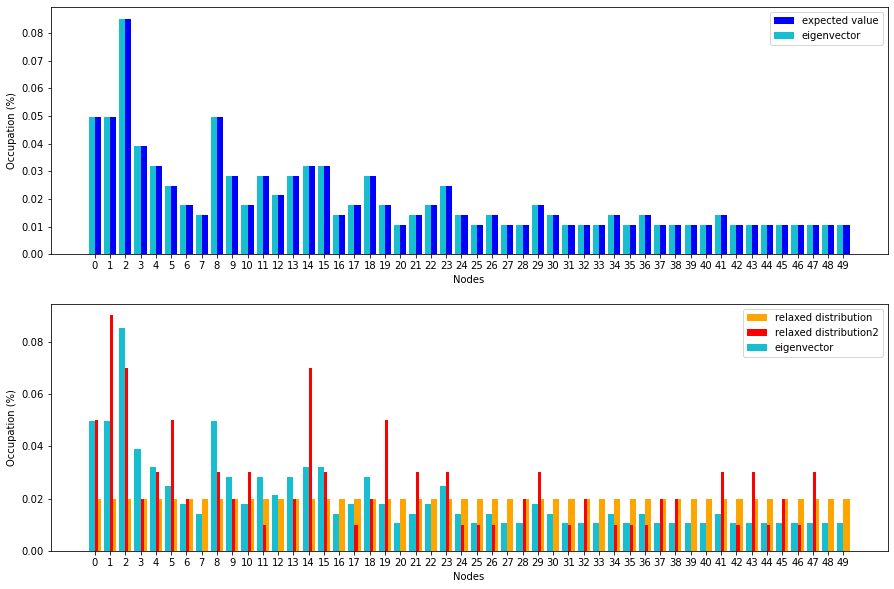

In [29]:
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize=(0.3*N, 10))

# for n in range(100):
#     if n == 99:
#         plt.plot(G.nodes, [h/sum(history[len(history)-1]) for h in history[len(history)-1]], 'r', label = "relaxed distribution", alpha = 1)
#     else:
#         y = int(n * len(history) / 100)
#         plt.plot(G.nodes, [h/sum(history[y]) for h in history[y]], '#ca9bf7', label = "eigenvector", alpha = 0.05)
# plt.plot(G.nodes, [h/sum(pS) for h in pS], 'b' ,alpha = 1)


pS2 = [d for n, d in G.degree()]
# pS2 = [h/sum(pS2) for h in pS2]

ax[0].bar(G.nodes, [h/sum(pS2) for h in pS2], width=0.4, align='edge', color='blue', label = "expected value")
ax[0].bar(G.nodes, [h/sum(pS) for h in pS], width=-0.4, align='edge', color='tab:cyan', label = "eigenvector")

ax[1].bar(G.nodes, [h/sum(history[-1]) for h in history[-1]], width=0.4, 
       align='edge', color='orange', label = 'relaxed distribution')
ax[1].bar(G.nodes, [h/sum(history2[-1]) for h in history2[-1]], width=0.2, 
       align='edge', color='red', label = 'relaxed distribution2')
ax[1].bar(G.nodes, [h/sum(pS) for h in pS], width=-0.4, align='edge', color='tab:cyan', label = "eigenvector")

for i in [0,1]:
    ax[i].legend()
    ax[i].set_xlabel("Nodes")
    ax[i].set_ylabel("Occupation (%)")
    ax[i].set_xticks(np.arange(0, N, 1))
#     ax[i].grid(True)


plt.show()